<a href="https://colab.research.google.com/github/Cerasela-b/health-and-lifestyle-analytics/blob/main/notebook/health_and_lifestyle_analyze.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Loading and Inspecting the Dataset
To begin the analysis, we need to explore the dataset structure and understand the type of information it contains.
This step helps identify potential data quality issues, missing values, and the nature of each feature before we start the cleaning and modeling process.

In this step, we will:
- **Load** the CSV file from GitHub repository
- **Check** the dataset’s dimensions (number of rows and columns)
- **Preview** the first few rows to get an overview of the variables
- **Inspect** data types, value ranges, and basic statistical metadata
- **Identify** possible missing or inconsistent values

This initial inspection forms the foundation for further **data cleaning, feature engineering**, and **machine learning tasks**.

In [2]:
import pandas as pd

# Load dataset from GitHub
url = "https://raw.githubusercontent.com/Cerasela-b/health-and-lifestyle-analytics/main/data/health_lifestyle_dataset.csv"
df = pd.read_csv(url)

# Check dataset dimensions(number of rows and columns)
print("Dataset shape (rows, cloumns): ", df.shape)

print("\nFirst 5 rows: ")
print(df.head())

# Show column data types and non-null counts
print("\nDataset info: ")
df.info()

Dataset shape (rows, cloumns):  (100000, 16)

First 5 rows: 
   id  age  gender   bmi  daily_steps  sleep_hours  water_intake_l  \
0   1   56    Male  20.5         4198          3.9             3.4   
1   2   69  Female  33.3        14359          9.0             4.7   
2   3   46    Male  31.6         1817          6.6             4.2   
3   4   32  Female  38.2        15772          3.6             2.0   
4   5   60  Female  33.6         6037          3.8             4.0   

   calories_consumed  smoker  alcohol  resting_hr  systolic_bp  diastolic_bp  \
0               1602       0        0          97          161           111   
1               2346       0        1          68          116            65   
2               1643       0        1          90          123            99   
3               2460       0        0          71          165            95   
4               3756       0        1          98          139            61   

   cholesterol  family_history  disea


## Dataset Loading and Initial Inspection

The dataset was successfully loaded from GitHub and contains **100,000 rows** and **16 columns** describing various **health and lifestyle factors** such as age, BMI, sleep, activity level, and disease risk.

All columns have **non-null values**, ensuring a clean starting point for analysis.
The dataset includes a mix of **numeric** and **categorical** variables — with `gender` as an object type and several binary indicators already encoded as integers.

**Key observations**:

- Data types: 12 integer, 3 float, 1 object (`gender`)
- Binary columns (`smoker`, `alcohol`, `family_history`) are already encoded as 0/1
- No missing data detected across any column
- Each record represents one individual’s lifestyle and health profile

The data is well-structured and ready for **cleaning, preprocessing**, and **exploratory data analysis (EDA)** to identify relationships between lifestyle habits and disease risk.

## Data Cleaning & Preprocessing

The dataset is already complete, with no missing values across any columns.
Therefore, this step focuses on refining data quality and ensuring readiness for analysis.

In this step, we will:
- Remove the non-informative identifier column (`id`)
- Encode the categorical column (`gender`) for ML compatibility
- Review numerical features to detect potential outliers
- Apply scaling or normalization if required for certain models

With no missing values, the preprocessing process emphasizes **feature encoding, structure optimization, and data consistency** for the next analysis phase.

In [3]:
# Remove the 'id' column as it is not useful for modeling
df = df.drop(columns=['id'], errors='ignore')

# Preview remaining columns
print("Remaining columns: ")
print(df.columns.tolist())

# Convert column 'gender' to category
df['gender'] = df['gender'].astype('category')
print("\nGender column converted to type:", df['gender'].dtype)

# Review numerical features
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
print("Numerical columns:", numerical_cols.tolist())
df[numerical_cols].describe()

Remaining columns: 
['age', 'gender', 'bmi', 'daily_steps', 'sleep_hours', 'water_intake_l', 'calories_consumed', 'smoker', 'alcohol', 'resting_hr', 'systolic_bp', 'diastolic_bp', 'cholesterol', 'family_history', 'disease_risk']

Gender column converted to type: category
Numerical columns: ['age', 'bmi', 'daily_steps', 'sleep_hours', 'water_intake_l', 'calories_consumed', 'smoker', 'alcohol', 'resting_hr', 'systolic_bp', 'diastolic_bp', 'cholesterol', 'family_history', 'disease_risk']


,age,bmi,daily_steps,sleep_hours,water_intake_l,calories_consumed,smoker,alcohol,resting_hr,systolic_bp,diastolic_bp,cholesterol,family_history,disease_risk
count,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000
mean,48.525990,29.024790,10479.87029,6.491784,2.751496,2603.341200,0.200940,0.300020,74.457420,134.58063,89.508850,224.300630,0.299150,0.248210
std,17.886768,6.352666,5483.63236,2.021922,1.297338,807.288563,0.400705,0.458269,14.423715,25.95153,17.347041,43.327749,0.457888,0.431976
min,18.000000,18.000000,1000.00000,3.000000,0.500000,1200.000000,0.000000,0.000000,50.000000,90.00000,60.000000,150.000000,0.000000,0.000000
25%,33.000000,23.500000,5729.00000,4.700000,1.600000,1906.000000,0.000000,0.000000,62.000000,112.00000,74.000000,187.000000,0.000000,0.000000
50%,48.000000,29.000000,10468.00000,6.500000,2.800000,2603.000000,0.000000,0.000000,74.000000,135.00000,89.000000,224.000000,0.000000,0.000000
75%,64.000000,34.500000,15229.00000,8.200000,3.900000,3299.000000,0.000000,1.000000,87.000000,157.00000,105.000000,262.000000,1.000000,0.000000
max,79.000000,40.000000,19999.00000,10.000000,5.000000,3999.000000,1.000000,1.000000,99.000000,179.00000,119.000000,299.000000,1.000000,1.000000


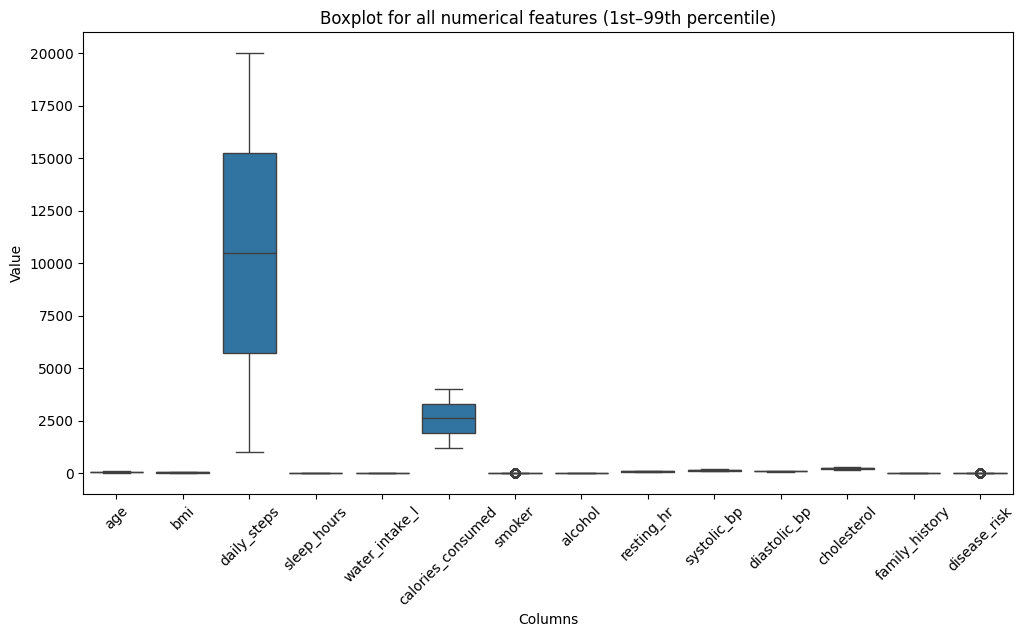

In [4]:
# Visualize distribution for outliners
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
df_numeric = df[numerical_cols]

# Convert to long format
df_melted = df_numeric.melt(var_name='Columns', value_name='Value')

# Plot single boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x='Columns', y='Value', data=df_melted)
plt.xticks(rotation=45)
plt.title("Boxplot for all numerical features (1st–99th percentile)")
plt.show()

In [5]:
# Scaling outliners 'daily_steps' and 'calories_consummed'
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
df[['daily_steps', 'calories_consumed']] = scaler.fit_transform(df[['daily_steps', 'calories_consumed']])
df_scaled = df.copy()
print("\nStatistics after scaling:")
print(df_scaled[['daily_steps', 'calories_consumed']].describe())


Statistics after scaling:
         daily_steps  calories_consumed
count  100000.000000      100000.000000
mean        0.001250           0.000245
std         0.577224           0.579532
min        -0.996632          -1.007179
25%        -0.498842          -0.500359
50%         0.000000           0.000000
75%         0.501158           0.499641
max         1.003263           1.002154


## Feature Influence on `disease_risk`

We visualized how each feature affects `disease_risk` using an **interactive horizontal bar chart**:
- **Red bars (↑ Increases Risk)** → features that increase disease risk.
- **Blue bars (↓ Decreases Risk)** → features that reduce disease risk.
- **Bar length** → relative influence (%) of each feature.

This chart provides a **clear, intuitive view of both the direction and magnitude of influence**, helping identify the most important risk and protective factors.

In [6]:
# Visualize the correlation between life style and risk deasese
import plotly.express as px
import pandas as pd
import numpy as np

# The columns
cols = ['age', 'bmi', 'daily_steps', 'sleep_hours', 'water_intake_l',
        'calories_consumed', 'smoker', 'alcohol', 'resting_hr',
        'systolic_bp', 'diastolic_bp', 'cholesterol', 'family_history']

# Correlations with disease_risk
corr = df[cols + ['disease_risk']].corr()['disease_risk'].drop('disease_risk')

# Calculating the percentage
corr_percent = (abs(corr) / abs(corr).sum()) * 100

# Preparing the DataFrame for grafic
corr_df = pd.DataFrame({
    'Feature': corr.index,
    'Correlation': corr.values,  # păstrează semnul
    'Influence (%)': corr_percent.values
}).sort_values(by='Correlation', ascending=True)

# Adding color according to direction
corr_df['Direction'] = np.where(corr_df['Correlation'] > 0, '↑ Increases Risk', '↓ Decreases Risk')

# Interactive Barplot
fig = px.bar(
    corr_df,
    x='Influence (%)',
    y='Feature',
    orientation='h',
    color='Direction',
    color_discrete_map={'↑ Increases Risk': '#d62728', '↓ Decreases Risk': '#1f77b4'},
    text='Influence (%)',
    title='Feature Influence on Disease Risk (Proportional & Directional)'
)

# Stiling the Barplot
fig.update_traces(texttemplate='%{text:.2f}%', textposition='outside')
fig.update_layout(
    template='plotly_white',
    xaxis_title='Influence (%)',
    yaxis_title='Feature',
    title_font_size=20,
    height=700,
    legend_title_text='Effect Direction'
)

fig.show()




